### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import seaborn as sns

### Read the Data

In [2]:
data = pd.read_csv('project.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-12,4590.0,4820.0,4400.0,4790.0,3967.080078,45837700
1,2020-06-15,4800.0,4850.0,4700.0,4740.0,3925.670410,42880500
2,2020-06-16,4800.0,5000.0,4800.0,4970.0,4116.156250,38736700
3,2020-06-17,4990.0,5000.0,4910.0,4970.0,4116.156250,24744500
4,2020-06-18,4970.0,4970.0,4800.0,4800.0,3975.361328,40331900


### Exploration Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       729 non-null    object 
 1   Open       729 non-null    float64
 2   High       729 non-null    float64
 3   Low        729 non-null    float64
 4   Close      729 non-null    float64
 5   Adj Close  729 non-null    float64
 6   Volume     729 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.0+ KB


In [4]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Change The date Format

In [5]:
data['Date'] = data['Date'].str.replace('-', '').astype(int)

print(data['Date'])

0      20200612
1      20200615
2      20200616
3      20200617
4      20200618
         ...   
724    20230605
725    20230606
726    20230607
727    20230608
728    20230609
Name: Date, Length: 729, dtype: int32


### Find The Correlation using Heatmap

<AxesSubplot:>

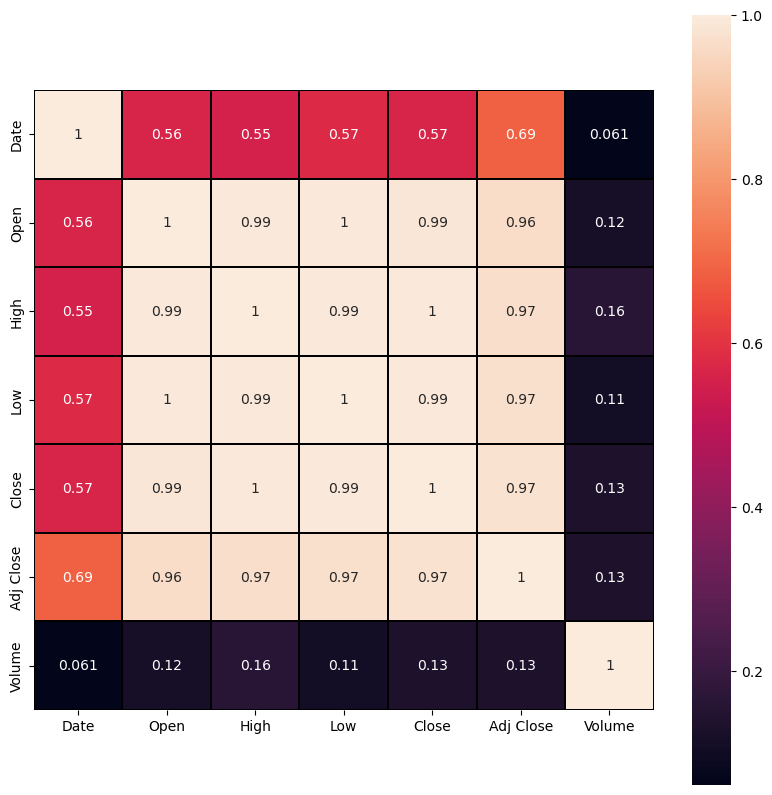

In [6]:
f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, linecolor='black', annot=True)

# Linear Regression

### Import Library

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Define X and y value

In [8]:
X = data[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
y = data['Close']

### Modelling 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions
y_pred = model.predict(X_test)

### Linear Regression visualization

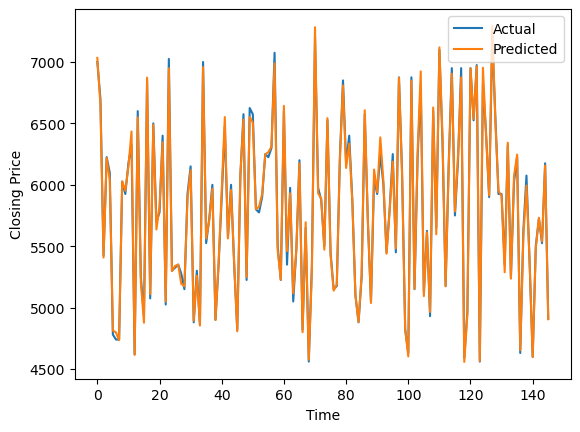

In [12]:
# Visualize the predictions
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### Evaluate the model

In [13]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 33.018389114465315
R-squared (R^2): 0.9961548681770083


# Polynomial Regression

### Import Library

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


### Read the Data

In [15]:
dataPoly = pd.read_csv('project.csv')


### Define Variable

In [16]:
X = dataPoly[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
y = dataPoly['Close']


### Split The Dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling the data

In [18]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [19]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test_poly)


### Polynomial Regression visualization

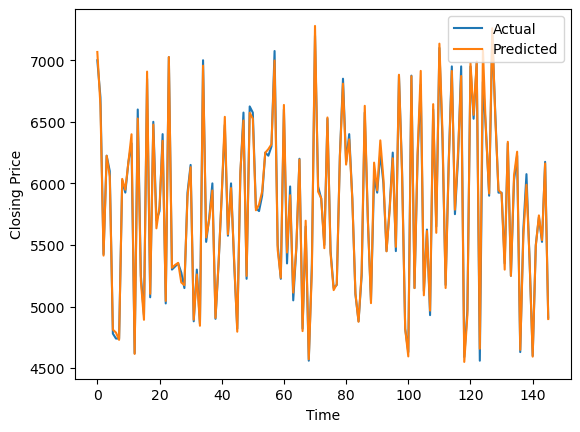

In [21]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### Evaluate the model

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)


Mean Absolute Error (MAE): 33.93641989970448
R-squared (R^2): 0.995538120227065
